# BankNote Authentication Prediction

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset

data = pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Project 8-9-10/data_banknote_authentication.csv")

In [3]:
# check the first five sample data

data.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# check the information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Kurtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
# Statistical Analysis

data.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


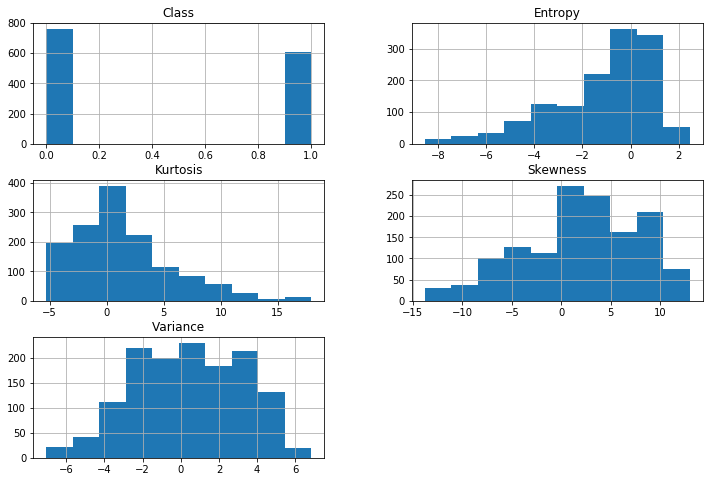

In [6]:
# Univariate Analysis

data.hist(figsize=(12,8))
plt.show()

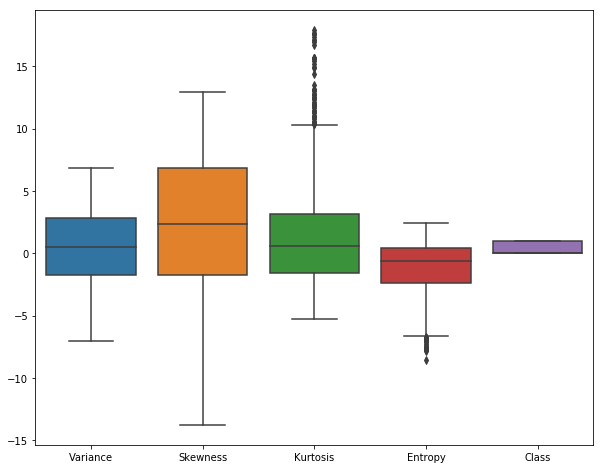

In [7]:
# Lets draw boxplots to find the outliers

plt.figure(figsize=(10,8))
sns.boxplot(data=data)

In [8]:
# Since two variables have missing values in it, we can treat the outliers on feature Kurtosis

Q1 = data.Kurtosis.quantile(0.25)
Q3 = data.Kurtosis.quantile(0.75)
IQR = Q3 - Q1

outlier_min = Q1-1.5*IQR
outlier_max = Q3+1.5*IQR

new_data = data[data.Kurtosis < outlier_max]
new_data.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
# Treatement of the outliers on the feature entropy 

Q1 = new_data.Entropy.quantile(0.25)
Q3 = new_data.Entropy.quantile(0.75)
IQR = Q3 - Q1

outlier_min = Q1-1.5*IQR
outlier_max = Q3+1.5*IQR

final_data = new_data[(new_data.Entropy > outlier_min)]
final_data.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
# we reduced the size of the data by outlier treatment

print('We reduced the data size by: %d' % (len(data) - len(final_data)))

We reduced the data size by: 94


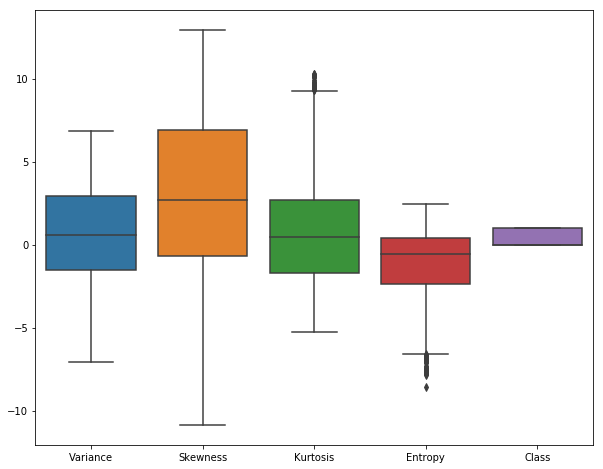

In [11]:
# Again plotting the boxplot for the data

plt.figure(figsize=(10,8))
sns.boxplot(data=new_data)

In [12]:
# segregating the target and features

X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

X.head()

,Variance,Skewness,Kurtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [13]:
# scaling the features for the normal distribution

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)
X.head()

,Variance,Skewness,Kurtosis,Entropy
0,1.079384,1.204246,-1.036622,0.297292
1,1.425708,1.110385,-0.939152,-0.235050
2,1.170958,-0.923367,0.285954,0.587526
3,1.017560,1.365487,-1.373144,-1.353265
4,-0.154225,-1.265328,1.026027,0.013157


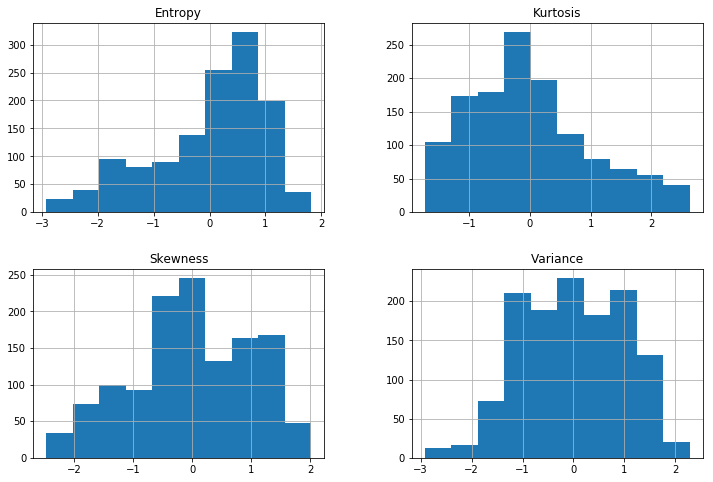

In [14]:
X.hist(figsize=(12,8))
plt.show()

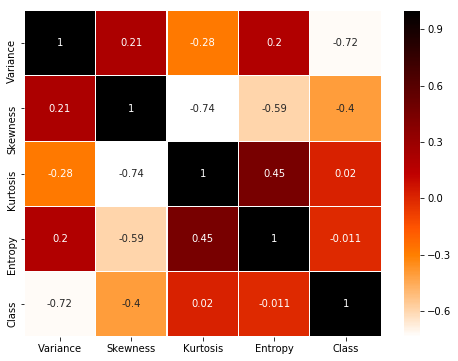

In [15]:
# check the correlation and draw heat map

plt.figure(figsize=(8,6))
sns.heatmap(final_data.corr(),cmap='gist_heat_r',annot=True,linewidths=0.1)

#### By the heatmap, we can easily observe that feature Kurtosis and Ebtrop are poorly correlated iwth the traget. However, the features variance and skewness plays a vital role.

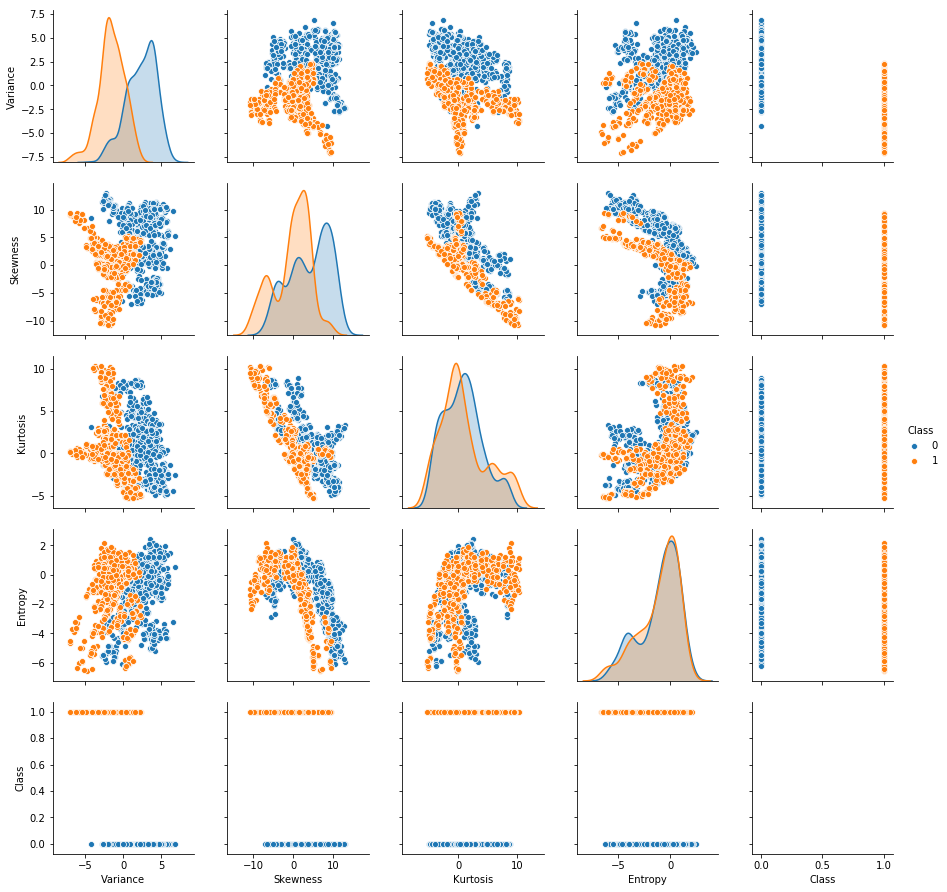

In [16]:
# Bivariate analysis

sns.pairplot(final_data,hue='Class')

In [17]:
# segregating the train and test data

from sklearn.model_selection import train_test_split, KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Implement all the algorithms

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
# appending all the models in a list

models=[]
results=[]
names=[]

models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM',SVC()))

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('RFC',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_de

In [20]:
#fitting the each model on the train set

for name,model in models:
    k_folds = KFold(n_splits=10, random_state=42)
    cv_score= cross_val_score(model,train_X,y=train_y,cv=k_folds,scoring='accuracy')
    results.append(cv_score)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_score.mean()*100, cv_score.std()))
    

LR: 98.215980 (0.012339)
KNN: 99.665418 (0.005111)
DT: 98.097378 (0.013344)
NB: 87.913858 (0.032260)
RFC: 99.218477 (0.007132)
SVM: 100.000000 (0.000000)


In [21]:
# Since KNN classifier is the good fitted model, we can check the predcition with this

knn = KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knn_predicted = knn.predict(test_X)
knn_predicted

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [23]:
knn_score=accuracy_score(test_y,knn_predicted)

print ('KNN Model :')
print ('Accuracy score : %.2f' %(knn_score*100))
print ('Classfication report : ')
print (classification_report(test_y,knn_predicted))
print ('confusion_matrix : ')
print (confusion_matrix(test_y,knn_predicted))

KNN Model :
Accuracy score : 100.00
Classfication report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       160

   micro avg       1.00      1.00      1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384

confusion_matrix : 
[[224   0]
 [  0 160]]
